In [211]:
# Using Twint, gathering tweets about the hashtag(in example its "tuborg") for a determined period. 
#Then, after cleaning the tweets and tidying up, WordCloud is generated

import pandas as pd
import os 

import matplotlib.pyplot as plt

import twint
import preprocessor as p


# From textblob import TextBlob
from wordcloud import WordCloud

# For Turkish, this library fixes corrupted sentences to corrected ones.
from turkishnlp import detector
obj = detector.TurkishNLP()
obj.create_word_set()

# For Turkish stopwords
import nltk
nltk.download('stopwords')
stop_word_list = nltk.corpus.stopwords.words('turkish')
additional_stop_words = ["bir","dek","zaten","kadar","var","kadar"]
stop_word_list.extend(additional_stop_words)

UsageError: Line magic function `%` not found.


In [78]:
def gather_tweets(search,date1,date2):
    #("search_term","1_year-month-day","2_year-month-day")
    c = twint.Config()
    c.Store_csv = True
    c.Timedelta = 2
    c.Lang = "tr"
    c.Lowercase = True
    c.Hide_output = True
    c.Custom['tweet'] = ['tweet','date']
    c.Output = "{}.csv".format(search)
    c.Search = "#{}".format(search)
    c.Since = date1
    c.Until = date2
    file = "{}.csv".format(search)
    twint.run.Search(c)
    
def tweet_clean(text):
    return p.clean(text)

# ***** CORRECT FOR TURKISH 
def correct_sentence(text):
    lwords = obj.list_words(text)
    corrected_words = obj.auto_correct(lwords)
    corrected_string = " ".join(corrected_words)
    return corrected_string

In [168]:
gather_tweets("tuborg","2018-01-01","2018-12-20")

In [169]:
df = pd.read_csv("tuborg.csv",index_col=['date'])

In [180]:
# Cleaning tweets
df['tweet2'] = df['tweet'].apply(lambda x: p.clean(x))
df['tweet2'] = df['tweet2'].apply(lambda x: x.lower())
df['tweet3'] = df['tweet2'].apply(lambda x: correct_sentence(x))
df['tweet4'] = df['tweet3'].apply(lambda x: " ".join([i for i in x.split(" ") if i not in stop_word_list])) 
#using nltk stop words for Turkish, but ofc it's not enough.

In [213]:
# For WordCloud, take whole column into a string
text = ' '.join(df['tweet4'].tolist()) 

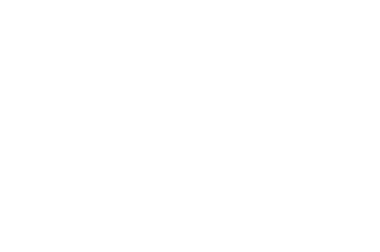

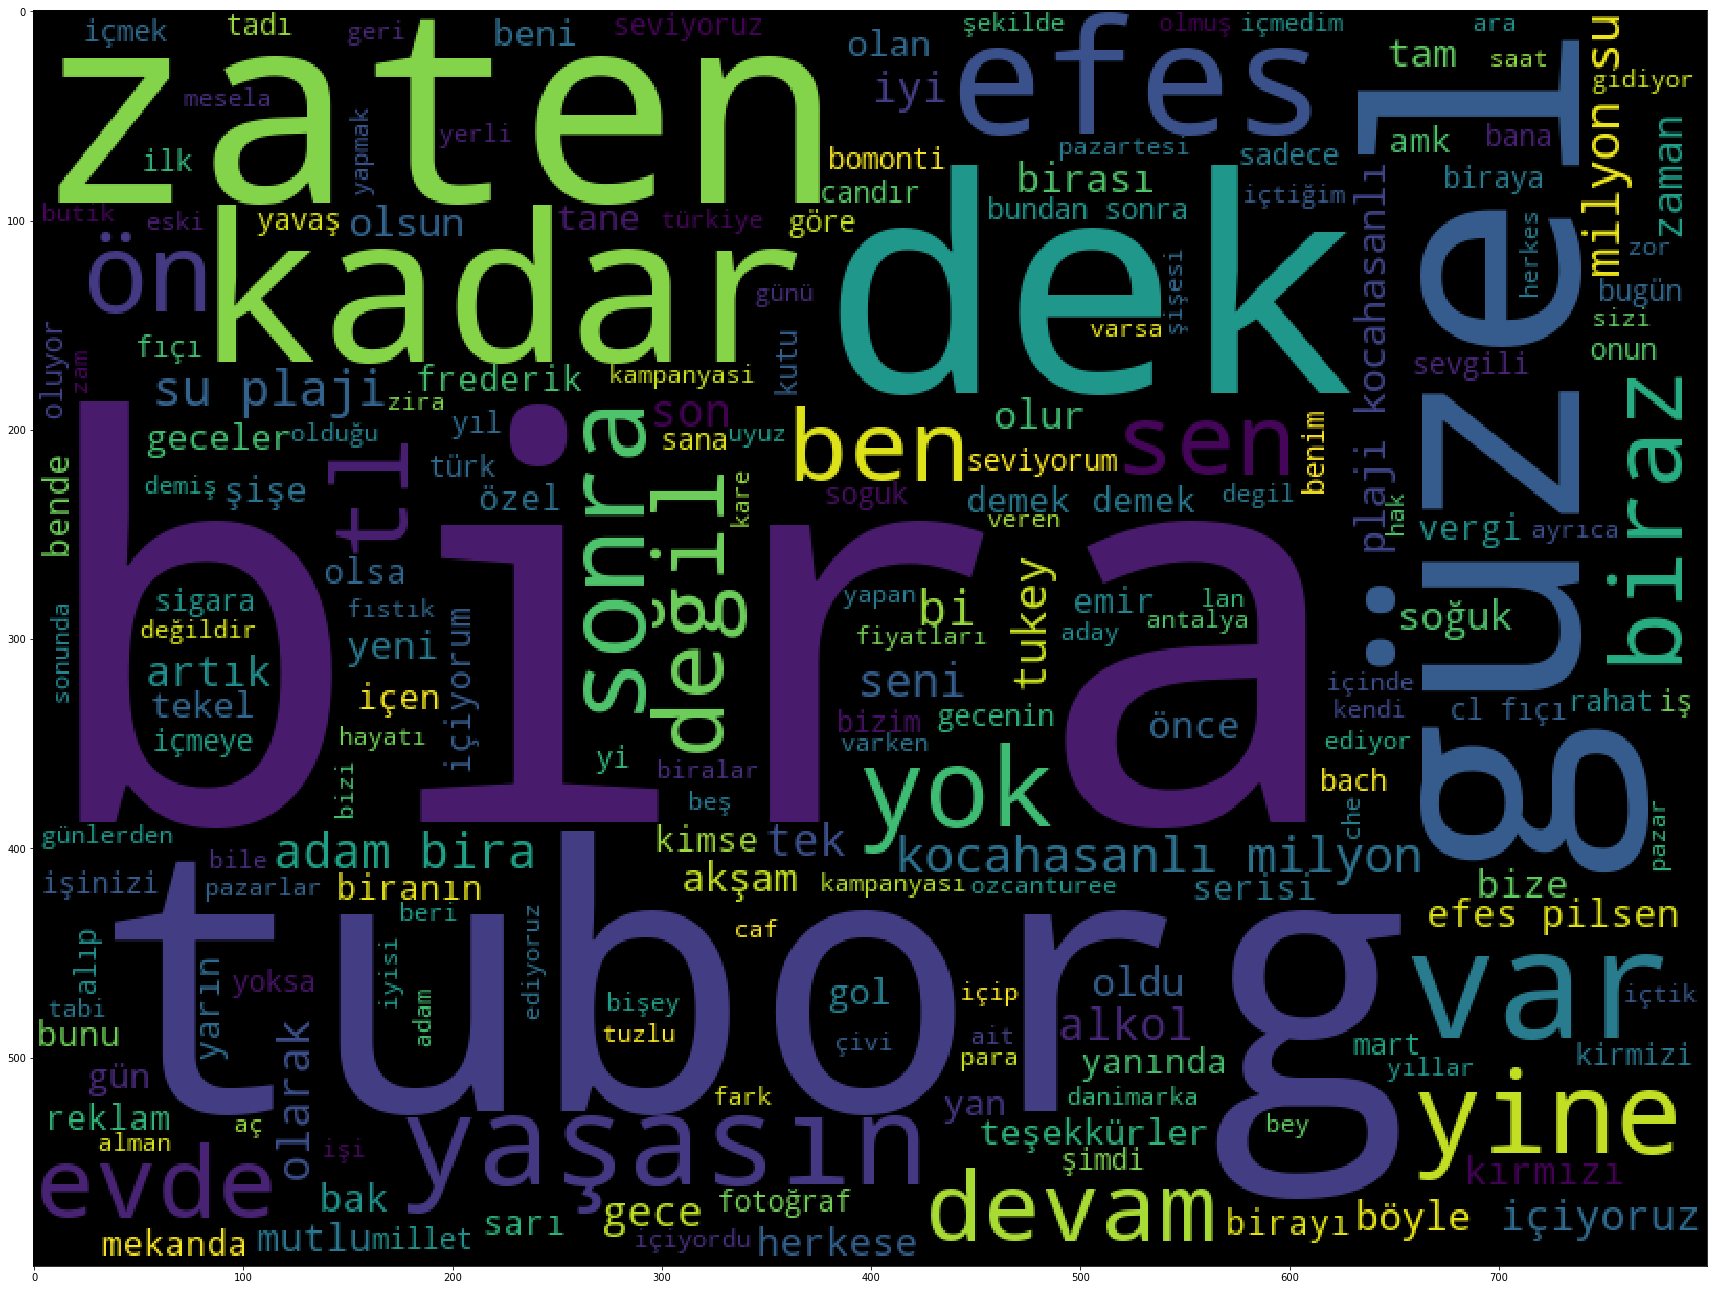

In [218]:
wordcloud = WordCloud(width=800, height=600).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.figure(figsize=[30,30])
plt.figure( figsize=(30,30) )
plt.imshow(wordcloud)